# EMPLOYEE SALARIES FOR DIFFERENT JOB ROLES

In [18]:
import pandas as pd

In [19]:
data = pd.read_csv('D:\Data Science Project\Employee Salaries for Different Job Roles/ds_salaries.csv')

In [20]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [21]:
data.tail(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [23]:
data.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


# DATA PREPROCESSING

In [25]:
print("    Size of the Table ")
print("Number of Rows:",data.shape[0])
print("Number of Columns:",data.shape[1])

    Size of the Table 
Number of Rows: 607
Number of Columns: 12


In [26]:
data = data.rename(columns={'Unnamed: 0':'S.No.'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   S.No.               607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [33]:
data.isnull().sum()

S.No.                 0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [35]:
employment_type = data.groupby('employment_type').size()
employment_type

employment_type
CT      5
FL      4
FT    588
PT     10
dtype: int64

In [47]:
data['employment_type'] = data['employment_type'].replace({'CT':'Contract','FL':'Freelance','PT':'Part Time','FT':'Full Time'})
employment_type_updated = data.groupby('employment_type').size()
employment_type_updated

employment_type
Contract       5
Freelance      4
Full Time    588
Part Time     10
dtype: int64

In [38]:
experience_level = data.groupby('experience_level').size()
experience_level

experience_level
EN     88
EX     26
MI    213
SE    280
dtype: int64

In [39]:
# EN - Entry Level
# EX - Experienced
# MI - Mid Level
# SE - Senior Level

In [46]:
data['experience_level'] = data['experience_level'].replace({'EN':'Entry Level','EX':'Experienced',
                                                             'MI':'Mid Level','SE':'Senior Level'})
experience_level_updated = data.groupby('experience_level').size()
experience_level_updated

experience_level
Entry Level      88
Experienced      26
Mid Level       213
Senior Level    280
dtype: int64

In [43]:
company_size = data.groupby('company_size').size()
company_size

company_size
L    198
M    326
S     83
dtype: int64

In [45]:
data['company_size'] = data['company_size'].replace({'L':'Large','S':'Small','M':'Medium'})
company_size_updated = data.groupby('company_size').size()
company_size_updated

company_size
Large     198
Medium    326
Small      83
dtype: int64

In [48]:
# Dropping unwanted columns
data=data.drop(columns=['salary_in_usd','employee_residence'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   S.No.             607 non-null    int64 
 1   work_year         607 non-null    int64 
 2   experience_level  607 non-null    object
 3   employment_type   607 non-null    object
 4   job_title         607 non-null    object
 5   salary            607 non-null    int64 
 6   salary_currency   607 non-null    object
 7   remote_ratio      607 non-null    int64 
 8   company_location  607 non-null    object
 9   company_size      607 non-null    object
dtypes: int64(4), object(6)
memory usage: 47.6+ KB


In [49]:
data.head()

,S.No.,work_year,experience_level,employment_type,job_title,salary,salary_currency,remote_ratio,company_location,company_size
0,0,2020,Mid Level,Full Time,Data Scientist,70000,EUR,0,DE,Large
1,1,2020,Senior Level,Full Time,Machine Learning Scientist,260000,USD,0,JP,Small
2,2,2020,Senior Level,Full Time,Big Data Engineer,85000,GBP,50,GB,Medium
3,3,2020,Mid Level,Full Time,Product Data Analyst,20000,USD,0,HN,Small
4,4,2020,Senior Level,Full Time,Machine Learning Engineer,150000,USD,50,US,Large


In [51]:
data.to_csv('Employee Salary.csv',index=False)

# DATA VISUALIZATION AND EDA

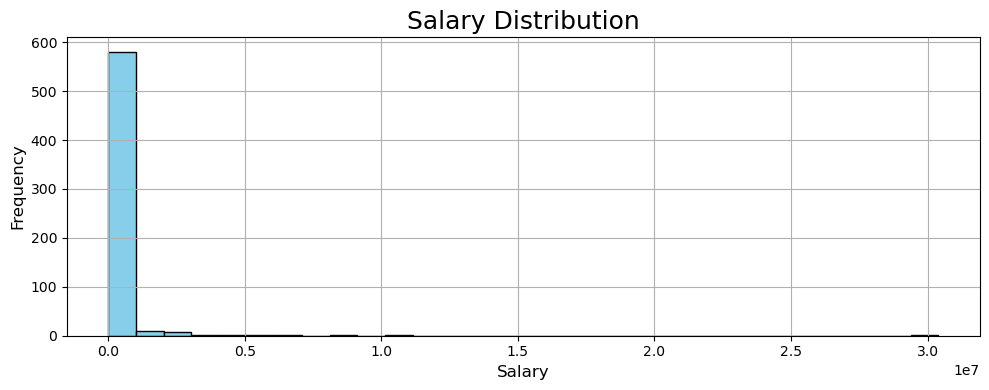

In [55]:
# Salary Distribution

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
data['salary'].plot.hist(bins=30,color='skyblue',edgecolor='black')
plt.title('Salary Distribution',fontsize=18)
plt.xlabel('Salary',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.tight_layout()
plt.grid(True)
plt.show()

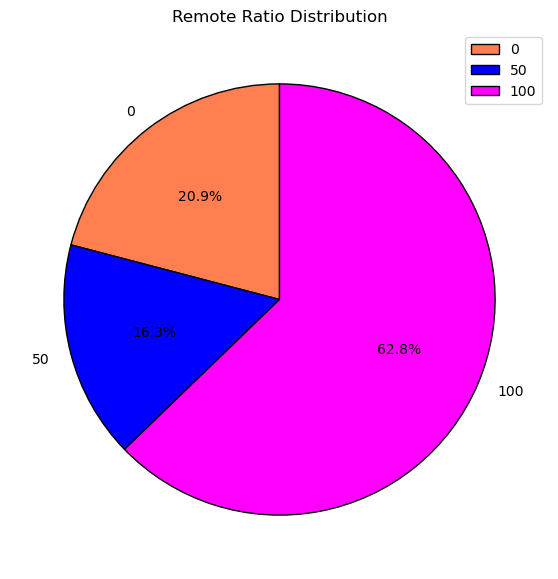

In [63]:
# Remote Ratio
remote_ratio = data.groupby('remote_ratio').size()

plt.figure(figsize=(7,7))
plt.pie(remote_ratio,autopct='%1.1f%%',startangle=90,labels=remote_ratio.index,
        colors=['coral','blue','magenta'],wedgeprops={'edgecolor':'black'})
plt.title('Remote Ratio Distribution')
plt.legend()
plt.show()

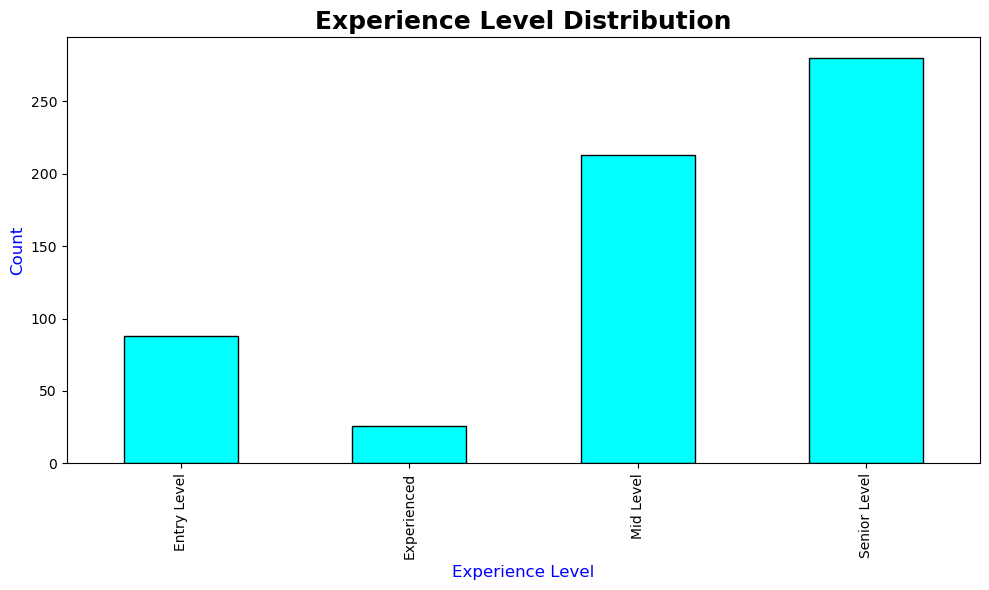

In [69]:
# Experience Level Distribution
experience_level = data.groupby('experience_level').size()
plt.figure(figsize=(10,6))
experience_level.plot.bar(color='cyan',edgecolor='black')
plt.title('Experience Level Distribution',fontsize=18,fontweight='bold')
plt.xlabel('Experience Level',fontsize=12,color='blue')
plt.ylabel('Count',fontsize=12,color='blue')
plt.tight_layout()
plt.show()

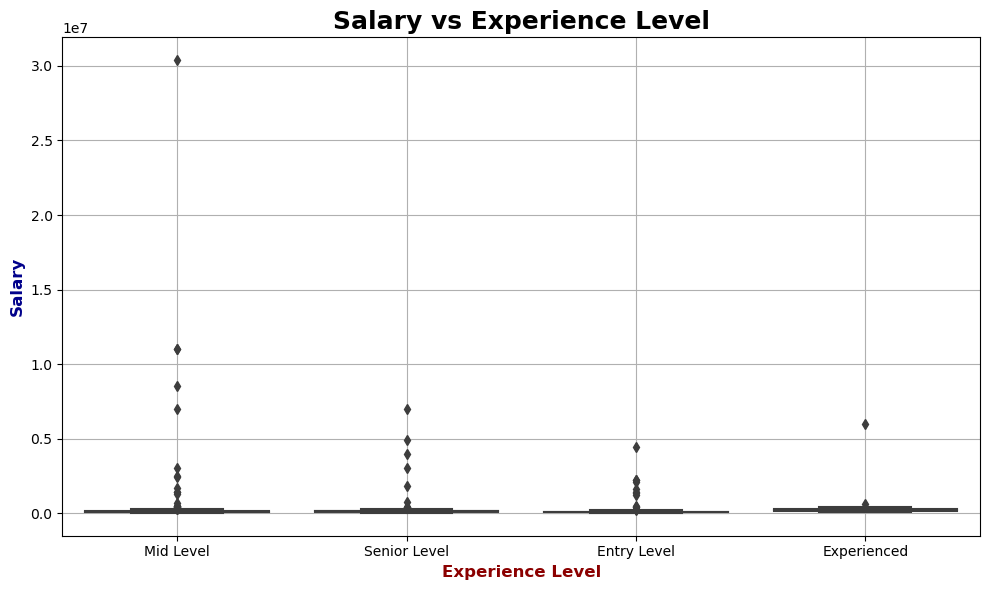

In [70]:
# Salary vs Experience Level

import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='experience_level',y='salary',data=data)
plt.title('Salary vs Experience Level',fontsize=18,fontweight='bold')
plt.xlabel('Experience Level',fontsize=12,fontweight='bold',color='darkred')
plt.ylabel('Salary',fontsize=12,fontweight='bold',color='darkblue')
plt.tight_layout()
plt.grid(True)
plt.show()

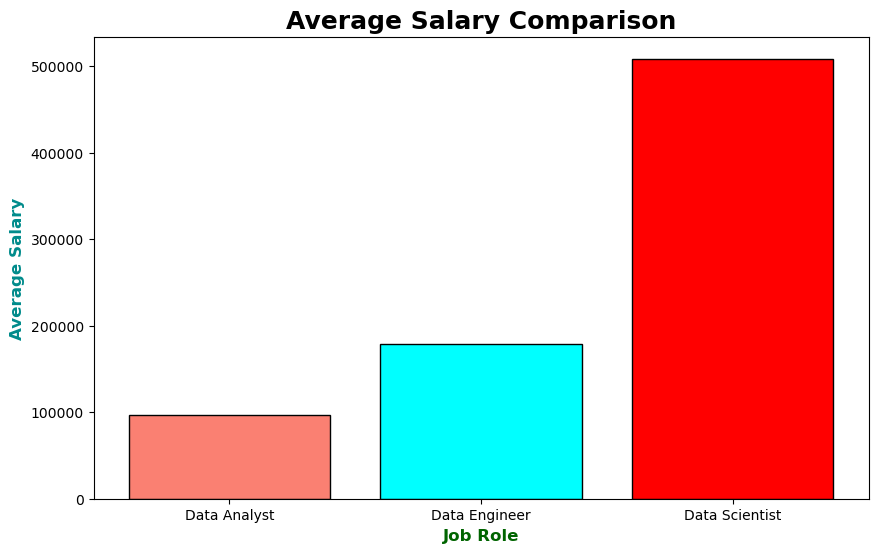

In [75]:
# Find average salary of the Job Role 

job_role = ['Data Analyst','Data Engineer','Data Scientist']

avg_salary = [data[data['job_title'] == title]['salary'].mean() for title in job_role]
plt.figure(figsize=(10,6))
plt.bar(job_role,avg_salary,color=['salmon','cyan','red'],edgecolor='black')
plt.title('Average Salary Comparison',fontsize=18,fontweight='bold')
plt.xlabel('Job Role',fontsize=12,fontweight='bold',color='darkgreen')
plt.ylabel('Average Salary',fontsize=12,fontweight='bold',color='darkcyan')
plt.show()

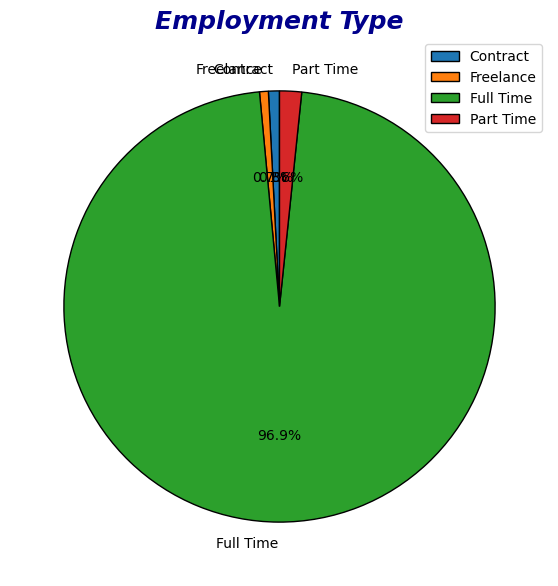

In [83]:
# Employment Type

emp_type = data.groupby('employment_type').size()
plt.figure(figsize=(7,7))
plt.pie(emp_type,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'},startangle=90,labels=emp_type.index)
plt.title("Employment Type",fontsize=18,fontweight='bold',fontstyle='italic',color='darkblue')
plt.legend()
plt.show()